In [1]:
import numpy as np
from tqdm import tqdm
import pandas as pd
from itertools import product
from functools import partial
import matplotlib.pyplot as plt 

In [2]:
def transition_function(state, p):
    """
    Transition function for the infinte 1st quadrant Markov chain.
    """
    i, j = state
    if i == 1 and j == 1:
        return {
            (1,1): 1-p,
            (2,1): p/2,
            (1,2): p/2
        }
    elif i ==1  and j > 1:
        return {
            (i,j): (1-p)/2,
            (i+1,j): p/2,
            (i,j+1): p/2,
            (i,j-1): (1-p)/2
        }
    elif i > 1 and j == 1:
        return {
            (i,j): (1-p)/2,
            (i+1,j): p/2,
            (i-1,j): p/2,
            (i,j+1): (1-p)/2
        }
    else:
        return {
            (i+1,j): (1-p)/2,
            (i-1,j): p/2,
            (i,j+1): p/2,
            (i,j-1): (1-p)/2
        }

In [3]:
def simulate_markov_chain(transition_func, initial_state, steps,
                          return_trajectory=True):
    """
    Simulate a Markov chain given a transition function and an initial state.
    """
    state = initial_state
    if return_trajectory:
        trajectory = [state]
    
    for _ in range(steps):
        transitions = transition_func(state)
        state_idx = np.random.choice(
            range(len(transitions)),
            p=list(transitions.values()))
        state = list(transitions.keys())[state_idx]
        if return_trajectory:
            trajectory.append(state)
    
    if return_trajectory:
        return np.array(trajectory)
    return np.array(state)

In [4]:
def manhattan_distance(state1, state2):
    """
    Calculate the Manhattan distance between two states.
    """
    return np.abs(state1 - state2).sum()

In [5]:
probabilities = np.array([.25, .35, .45])
# steps = np.array([10, 100, 1000])
steps = np.logspace(1, 3, num=10, dtype=int)
df = pd.DataFrame(
    columns=['p', 'steps'],
    data=np.array(list(product(probabilities, steps)))
)
df['n'] = 1e3
df['last_states'] = None
df

,p,steps,n,last_states
0,0.25,10.0,1000.0,None
1,0.25,16.0,1000.0,None
2,0.25,27.0,1000.0,None
3,0.25,46.0,1000.0,None
4,0.25,77.0,1000.0,None
5,0.25,129.0,1000.0,None
6,0.25,215.0,1000.0,None
7,0.25,359.0,1000.0,None
8,0.25,599.0,1000.0,None
9,0.25,1000.0,1000.0,None


In [6]:
initial_state = np.array([1, 1])
for i, row in df.iterrows():
    print(f"Simulating for p={row['p']}, steps={row['steps']} and n={row['n']}")
    aux_transition_function = partial(transition_function, p=row['p'])
    last_states = []
    for _ in range(int(row['n'])):
        last_states.append(
            simulate_markov_chain(aux_transition_function,
                                  initial_state,
                                  int(row['steps']),
                                  return_trajectory=False)
        )
    df.at[i, 'last_states'] = np.array(last_states)
df['manhattan_distances'] = df['last_states'].apply(
    lambda x: np.array([
        manhattan_distance(last_state, initial_state)
        for last_state in x
    ])
)
df['mean_manhattan_distance'] = df['manhattan_distances'].apply(
    lambda x: np.mean(x)
)
df['std_manhattan_distance'] = df['manhattan_distances'].apply(
    lambda x: np.std(x)
)
df

Simulating for p=0.25, steps=10.0 and n=1000.0
Simulating for p=0.25, steps=16.0 and n=1000.0
Simulating for p=0.25, steps=27.0 and n=1000.0
Simulating for p=0.25, steps=46.0 and n=1000.0
Simulating for p=0.25, steps=77.0 and n=1000.0
Simulating for p=0.25, steps=129.0 and n=1000.0
Simulating for p=0.25, steps=215.0 and n=1000.0
Simulating for p=0.25, steps=359.0 and n=1000.0
Simulating for p=0.25, steps=599.0 and n=1000.0
Simulating for p=0.25, steps=1000.0 and n=1000.0
Simulating for p=0.35, steps=10.0 and n=1000.0
Simulating for p=0.35, steps=16.0 and n=1000.0
Simulating for p=0.35, steps=27.0 and n=1000.0
Simulating for p=0.35, steps=46.0 and n=1000.0
Simulating for p=0.35, steps=77.0 and n=1000.0
Simulating for p=0.35, steps=129.0 and n=1000.0
Simulating for p=0.35, steps=215.0 and n=1000.0
Simulating for p=0.35, steps=359.0 and n=1000.0
Simulating for p=0.35, steps=599.0 and n=1000.0
Simulating for p=0.35, steps=1000.0 and n=1000.0
Simulating for p=0.45, steps=10.0 and n=1000.0
S

,p,steps,n,last_states,manhattan_distances,mean_manhattan_distance,std_manhattan_distance
0,0.25,10.0,1000.0,"[[1, 1], [1, 5], [1, 1], [2, 2], [2, 3], [2, 3...","[0, 4, 0, 2, 3, 3, 0, 0, 2, 2, 0, 2, 0, 0, 1, ...",1.784,1.705680
1,0.25,16.0,1000.0,"[[1, 1], [1, 2], [1, 5], [1, 2], [5, 1], [2, 2...","[0, 1, 4, 1, 4, 2, 3, 1, 7, 2, 5, 2, 3, 3, 0, ...",2.661,2.254347
2,0.25,27.0,1000.0,"[[1, 1], [10, 3], [3, 1], [4, 2], [4, 1], [7, ...","[0, 11, 2, 4, 3, 7, 5, 11, 2, 5, 1, 3, 2, 9, 2...",4.491,3.200300
3,0.25,46.0,1000.0,"[[5, 1], [5, 3], [3, 2], [7, 2], [2, 2], [6, 2...","[4, 6, 3, 7, 2, 6, 7, 11, 12, 2, 9, 11, 4, 7, ...",7.329,4.420041
4,0.25,77.0,1000.0,"[[15, 1], [11, 1], [9, 1], [15, 4], [12, 1], [...","[14, 10, 8, 17, 11, 6, 16, 16, 6, 4, 19, 15, 8...",11.484,5.700855
5,0.25,129.0,1000.0,"[[29, 1], [14, 2], [20, 3], [23, 1], [18, 1], ...","[28, 14, 21, 22, 17, 15, 19, 32, 10, 23, 12, 2...",19.496,7.336074
6,0.25,215.0,1000.0,"[[18, 1], [47, 2], [38, 1], [23, 2], [29, 2], ...","[17, 47, 37, 23, 29, 42, 47, 34, 35, 31, 13, 3...",32.703,9.398340
7,0.25,359.0,1000.0,"[[69, 2], [61, 2], [55, 1], [57, 2], [43, 3], ...","[69, 61, 54, 57, 44, 51, 54, 57, 64, 72, 47, 3...",54.338,12.024465
8,0.25,599.0,1000.0,"[[109, 2], [71, 2], [104, 1], [98, 2], [83, 1]...","[109, 71, 103, 98, 82, 78, 105, 93, 87, 72, 89...",89.454,16.423699
9,0.25,1000.0,1000.0,"[[130, 1], [143, 2], [139, 2], [168, 1], [186,...","[129, 143, 139, 167, 186, 187, 133, 214, 141, ...",151.181,21.365071


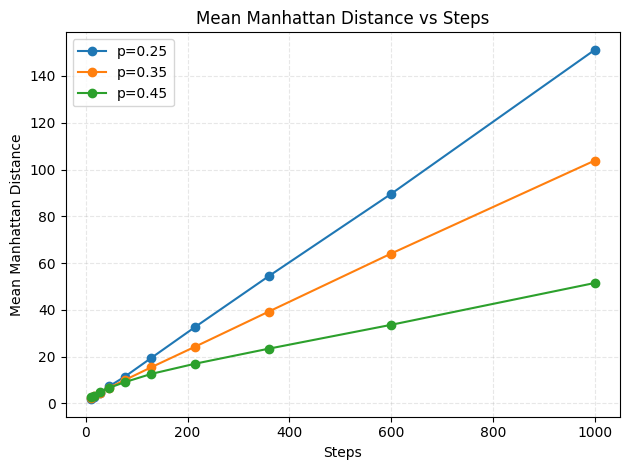

In [7]:
fig, ax = plt.subplots()
ax.grid(linestyle='--', alpha=.3)
ax.set(
    xlabel='Steps',
    ylabel='Mean Manhattan Distance',
    title='Mean Manhattan Distance vs Steps'
)
for p, data in df.groupby('p'):
    data.sort_values('steps', inplace=True)
    ax.plot(
        data['steps'],
        data['mean_manhattan_distance'],
        marker='o',
        label=f"p={p}"
    )
ax.legend()
fig.tight_layout()